# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


C/A  UNIT       SCP STATION LINENAME DIVISION        DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  00:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  04:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  08:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  12:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT  08/25/2018  16:00:00   

      DESC  ENTRIES  \
0  REGULAR  6736067   
1  REGULAR  6736087   
2  REGULAR  6736105   
3  REGULAR  6736180   
4  REGULAR  6736349   

   EXITS                                                                 
0                                            2283184                     
1                                            2283188                     
2                                            2283229                     
3                                            2283314                     
4                                            2283384

In [16]:
# Practice

## Objectives
#You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

SyntaxError: invalid syntax (<ipython-input-16-3c009a2234ee>, line 5)

# Rename all the columns to lower case

In [17]:
df.columns = [column.lower() for column in df.columns]
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

# Change the Index to be the Line Names

In [18]:
#Your code here
df = df.set_index('linename')
df.head()

c/a  unit       scp station division        date      time  \
linename                                                                
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  08:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  12:00:00   
NQR456W   A002  R051  02-00-00   59 ST      BMT  08/25/2018  16:00:00   

             desc  entries  \
linename                     
NQR456W   REGULAR  6736067   
NQR456W   REGULAR  6736087   
NQR456W   REGULAR  6736105   
NQR456W   REGULAR  6736180   
NQR456W   REGULAR  6736349   

          exits                                                                 
linename                                                                        
NQR456W                                             2283184                     
NQR456W                                             2283188                     
NQR456W                                             2283229                     
NQR456W                                             2283314                     
NQR456W                                             2283384

# Painstakingly change the index back

In [19]:
# Your code here
df = df.reset_index()
#df = df.drop('level_0',1)
#Drop function in pandas: drop('Column Name', 0 or 1 for Rows and Columns respectively)
df.head()

linename   c/a  unit       scp station division        date      time  \
0  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  00:00:00   
1  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  04:00:00   
2  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  08:00:00   
3  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  12:00:00   
4  NQR456W  A002  R051  02-00-00   59 ST      BMT  08/25/2018  16:00:00   

      desc  entries  \
0  REGULAR  6736067   
1  REGULAR  6736087   
2  REGULAR  6736105   
3  REGULAR  6736180   
4  REGULAR  6736349   

   exits                                                                 
0                                            2283184                     
1                                            2283188                     
2                                            2283229                     
3                                            2283314                     
4                                            2283384

## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [20]:
# Your code here
df['Num_Lines'] = df.linename.map(lambda lines: len(lines))

## Write a function to clean a column name.

In [21]:
def clean(col_name):
    cleaned = col_name.rstrip()
    return cleaned

In [22]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [23]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [24]:
#Your code here
df.date = pd.to_datetime(df.date)
#Converting Date-Time like values to Panadas Date-Time Format 
df['Dayofweek'] = df.date.dt.dayofweek
#Creating a datafram to group day of week values to group by 0-6 with 0 being Sunday and 6 being Saturday

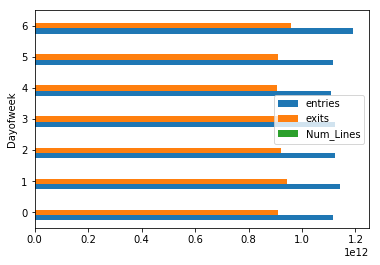

In [25]:
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [27]:
#Your code here
df.DATE.dt.dayofweek?
grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})

Object `df.DATE.dt.dayofweek` not found.


AttributeError: 'DataFrame' object has no attribute 'Dayofweek'

# Drop a couple of columns

In [ ]:
# Your code here